In [1]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Using cache found in /home/akors/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [13]:
# Download an example image
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")

urllib.request.urlretrieve(url, filename)

('TCGA_CS_4944.png', <http.client.HTTPMessage at 0x7f107035ad70>)

In [14]:
import numpy as np
from PIL import Image
from torchvision import transforms


In [15]:
input_image = Image.open(filename)

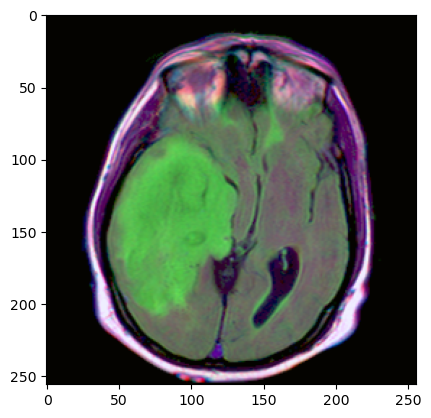

In [16]:
from matplotlib import pyplot as plt

plt.imshow(input_image)

In [27]:
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
   # transforms.Normalize(mean=m, std=s),
])

In [28]:
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

In [19]:
input_tensor.shape

torch.Size([3, 256, 256])

In [29]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

In [21]:
input_batch.shape

torch.Size([1, 3, 256, 256])

In [30]:
with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')


In [23]:
output.shape

torch.Size([1, 1, 256, 256])

In [24]:
output.sum()/output.shape.numel()

tensor(0.1710, device='cuda:0')

In [25]:
output.squeeze().cpu().numpy()

array([[1.5960133e-05, 1.1174883e-05, 1.6389063e-06, ..., 9.9528270e-06,
        1.5224747e-05, 7.7920286e-06],
       [1.0408382e-06, 3.9357806e-06, 2.3232390e-07, ..., 8.2132156e-06,
        5.1058346e-06, 6.2708382e-06],
       [2.5738582e-06, 1.8953921e-05, 1.1635398e-06, ..., 5.3753511e-06,
        6.0646466e-06, 8.6171631e-06],
       ...,
       [2.8802865e-06, 3.8919901e-05, 1.4299393e-05, ..., 5.9044305e-06,
        5.1524453e-06, 1.8334005e-06],
       [3.3624925e-08, 3.3773674e-06, 7.9950187e-06, ..., 1.7685886e-06,
        5.9042850e-07, 1.2000601e-06],
       [4.6758529e-08, 6.1608143e-06, 1.4079166e-06, ..., 3.7092084e-07,
        1.7611711e-06, 6.0911248e-06]], dtype=float32)

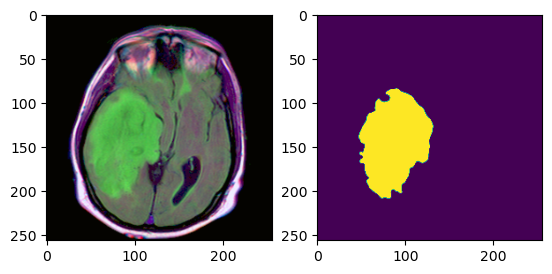

In [32]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(input_image)
ax[1].imshow(output[0,0,:,:].cpu().numpy())